# Fine-Tuning ResNet50 for Image Classification
This notebook demonstrates how to fine-tune a pretrained ResNet50 model for image classification using a custom dataset.

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# Load pre-trained ResNet50 weights (ensure correct path)
#weights_path = r"C:\Users\rajmo\Downloads\Disese dataset\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
#base_model = ResNet50(weights=weights_path, include_top=False, input_shape=(224, 224, 3))

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Split.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/13955856-c347-4039-ba30-09ea39d66534___NREC_B.Spot 9114_180deg.JPG  
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/13955856-c347-4039-ba30-09ea39d66534___NREC_B.Spot 9114_flipTB.JPG  
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/139a5c07-332c-4a2d-8bf2-bf33ce9184c6___NREC_B.Spot 1892_flipTB.JPG  
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/144ae14f-dbf4-4dfa-9d47-98fb33009a48___JR_B.Spot 3364.JPG  
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/14a96020-2720-43c5-8638-e70b90ebd573___JR_B.Spot 9039.JPG  
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/168a11c9-159b-468c-a6d9-07d0b61c42c9___JR_B.Spot 3193.JPG  
  inflating: /content/dataset/Split/validation/Pepper,_bell___Bacterial_spot/168a11c9-159b-468c-a6d9

## Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Freeze Base Model Layers

In [ ]:
# Freeze base model layers (prevents retraining pre-trained weights)
for layer in base_model.layers:
    layer.trainable = False

## Build Custom Classifier Head

In [ ]:
# Build the custom classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(50, activation='softmax')(x)  # Ensure number of classes matches your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model for training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Set Dataset Paths

In [ ]:
# Get dataset paths using os.path.join
train_data_dir ="/content/dataset/Split/train"
val_data_dir = "/content/dataset/Split/validation"
test_data_dir = "/content/dataset/Split/test"

## Train the Model with Data Augmentation

In [ ]:
# Train the model with data augmentation
history = model.fit(
    train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    ),
    epochs=10,
    validation_data=val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )
)

Found 34824 images belonging to 50 classes.
Found 9950 images belonging to 50 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  49/1089 ━━━━━━━━━━━━━━━━━━━━ 8:22 483ms/step - accuracy: 0.4032 - loss: 2.5287

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1089/1089 ━━━━━━━━━━━━━━━━━━━━ 577s 515ms/step - accuracy: 0.7412 - loss: 0.8665 - val_accuracy: 0.8286 - val_loss: 0.5143
Epoch 2/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 568s 474ms/step - accuracy: 0.8580 - loss: 0.3958 - val_accuracy: 0.8886 - val_loss: 0.3173
Epoch 3/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 517s 472ms/step - accuracy: 0.8752 - loss: 0.3515 - val_accuracy: 0.8885 - val_loss: 0.3117
Epoch 4/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 515s 469ms/step - accuracy: 0.8908 - loss: 0.3127 - val_accuracy: 0.8868 - val_loss: 0.3280
Epoch 5/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 508s 465ms/step - accuracy: 0.8970 - loss: 0.2895 - val_accuracy: 0.8831 - val_loss: 0.3436
Epoch 6/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 576s 478ms/step - accuracy: 0.9031 - loss: 0.2751 - val_accuracy: 0.9034 - val_loss: 0.2821
Epoch 7/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 509s 465ms/step - accuracy: 0.9104 - loss: 0.2574 - val_accuracy: 0.8892 - val_loss: 0.3235
Epoch 8/10
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 578s 480ms/step - accuracy: 0.9

## Save the Model

In [ ]:
# Save the model to a file
model_save_path = 'diseasedetect.keras'  # Add the .keras extension
model.save(model_save_path)
#modelpath = 'diseasedetect.h5'  # Use .h5 extension for HDF5 format


## Evaluate the Model

In [ ]:
import tensorflow as tf # Import tensorflow if not already imported

# Load the saved model
model = tf.keras.models.load_model(model_save_path)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(
    test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )
)

print(f"Test accuracy: {test_acc:.2f}")
print(f"Model saved to {model_save_path}")

Found 4976 images belonging to 50 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.9011 - loss: 0.3073
Test accuracy: 0.90
Model saved to diseasedetect.keras


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
model = tf.keras.models.load_model('diseasedetect.keras')

def get_class_names_from_directory(data_dir):

    class_names = sorted(os.listdir(data_dir))
    return class_names

train_data_dir = '/content/dataset/Split/train'  # Replace with your training data directory
class_names = get_class_names_from_directory(train_data_dir)

disease_names = np.array(class_names)

#print("Class Names Array:")
#print(disease_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


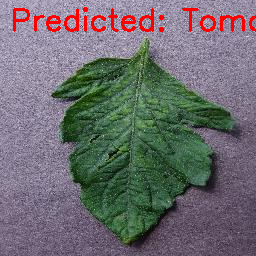

Detected Disease: Tomato___Tomato_mosaic_virus


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Load the saved model
model = tf.keras.models.load_model('diseasedetect.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to match your model's input shape
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to perform detection
def detect_disease(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Replace with your actual class names


    # Ensure predicted_class_index is within the valid range
    if 0 <= predicted_class_index < len(disease_names):
        predicted_class_name = disease_names[predicted_class_index]
    else:
        predicted_class_name = "Unknown"  # Handle cases where the index is out of range

    # Display the image and predicted class using cv2_imshow
    original_img = cv2.imread(image_path)
    cv2.putText(original_img, f"Predicted: {predicted_class_name}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2_imshow(original_img)  # Use cv2_imshow instead of cv2.imshow

    return predicted_class_name

# Example usage
image_path = '/content/8a01c89e-3a9f-465a-ac47-79cc99f5ffaa___PSU_CG 2329_180deg.JPG'
detected_disease = detect_disease(image_path)
print(f"Detected Disease: {detected_disease}")

In [ ]:
import json

# Your class names

# Define the file path for your class names JSON file
class_names_file = 'class_names.json'  # Or any other path you prefer

# Convert the NumPy array to a list before saving
disease_names_list = disease_names.tolist()  # Convert to list

# Save the class names to the file
with open(class_names_file, 'w') as f:
    json.dump(disease_names_list, f)  # Save the list

print(f"Class names saved to: {class_names_file}")

Class names saved to: class_names.json


In [ ]:
import json
from collections import OrderedDict

# Your class names

# Define the file path for your class names JSON file
class_names_file = 'class_names.json'  # Or any other path you prefer

# Create an OrderedDict to maintain order
class_names_dict = OrderedDict(enumerate(disease_names))

# Save the OrderedDict as JSON
with open(class_names_file, 'w') as f:
    json.dump(class_names_dict, f)

print(f"Class names saved to: {class_names_file}")

Class names saved to: class_names.json
